**Programming Exercise 1: Linear Regression**

**Introduction**

In this exercise, you will implement linear regression and get to see it work on data


In [3]:
#let’s you see the plots in the notbook itself.
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# define data source
pathdrive = '/content/drive/My Drive/Colab Notebooks/Coursera/ex1/'
datafile = pathdrive + '/data/ex1data1.txt'

In [6]:
#Exploring data with pandas
#In this file: 1-population of a city; 2-profit of a food truck in that city
import pandas as pd
df = pd.read_csv(datafile,  header=None)
df.columns = ["Population", "Profit"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2 Linear regression with one variable

In [8]:
#Get all cols in matrix format.
#Use numpy ndarray for best performance in calculations

#convert dataframe pandas into numpy ndarray 
data = df.to_numpy()

###for extract data without pandas...
###data = np.transpose(np.loadtxt(datafile, delimiter=',', unpack=True))

#Get "X" matrix, excluding last column 
X = data[:,:-1]

#Get "y" vector, from last column
y = data[:,-1:]

# m = number of training examples
m = y.size 

# The first column in X matrix must be 1's 
X = np.insert(X,0,1,axis=1)

#### 2.1 Plotting the Data

Text(0.5, 0, 'Population of City in 10,000s')

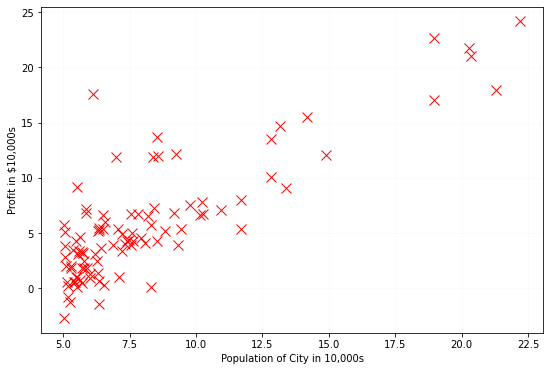

In [9]:
#Visualizing the data
plt.figure(figsize=(9,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
#plt.grid(True) #Always plot.grid true!
plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

#### 2.2 Gradient Descent

>$J(\theta)=\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$


In [10]:
#Linear hypothesis function
def h(X,theta): 
    return X @ theta

#Cost function
def computeCost(X,y,theta): 
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float( ( X @ theta - y ).T @ ( X @ theta-y ) / 2 / m )


#Test for running theta with zeros must returns 32.07

#initial_theta is being initialized with zeros...
#   below, X.shape[1] => number of features
#   initial_theta => a vector with n rows (n features) and 1 column
n_theta = X.shape[1]
initial_theta = np.zeros((n_theta,1)) 
print(computeCost(X,y,initial_theta))

32.072733877455676


In [11]:
#Actual gradient descent minimizing routine
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m=len(y) #number of training examples
    J_history = np.zeros(num_iters)
    theta_history= np.zeros((num_iters,initial_theta.shape[0]))
    
    for it in range(num_iters):

      #prediction = X @ theta
      #theta = theta - alpha/m*( X.T @ (X@prediction - y))
      theta = theta - alpha/m*( X.T @ (X @ theta - y))

      theta_history[it,:] = theta.T
      J_history[it] = computeCost(X, y, theta)

    return theta, theta_history, J_history
    

theta values: [[-3.63029144]
 [ 1.16636235]]


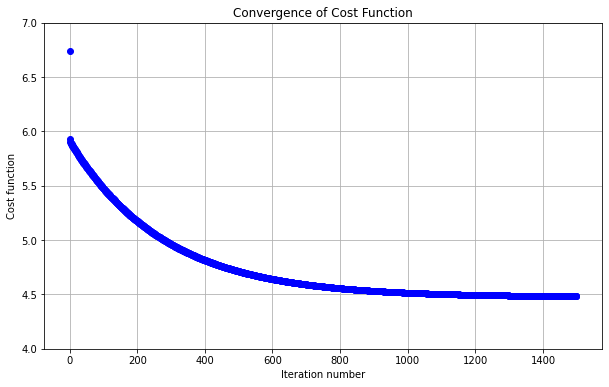

In [12]:
#execute gradient descent to get the best-fit theta values
iterations = 1500
alpha = 0.01
initial_theta = np.zeros((X.shape[1],1))
theta, theta_history, J_history = gradientDescentMulti(X,y,initial_theta, alpha, iterations)
print('theta values:', theta)

#Plot the convergence of the cost function
def plotData(J_history):    
    plt.figure(figsize=(10,6))
    lines = plt.plot(range(len(J_history)),J_history,'bo')
    plt.setp(lines, color='b', linewidth=2.0)    
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])

plotData(J_history)
dummy = plt.ylim([4,7])

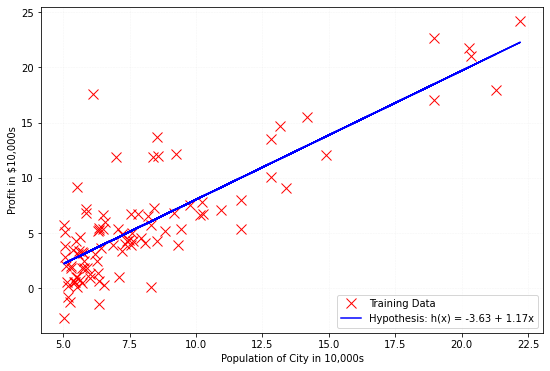

In [13]:
#Plot one line to predictions 
def predict(x_value):
    return theta[0] + theta[1]*x_value

plt.figure(figsize=(9,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(linestyle='--', linewidth=0.5, alpha=0.15)
plt.grid(True) 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(loc="lower right")

#### 2.4 Visualizing _J($\theta$)_


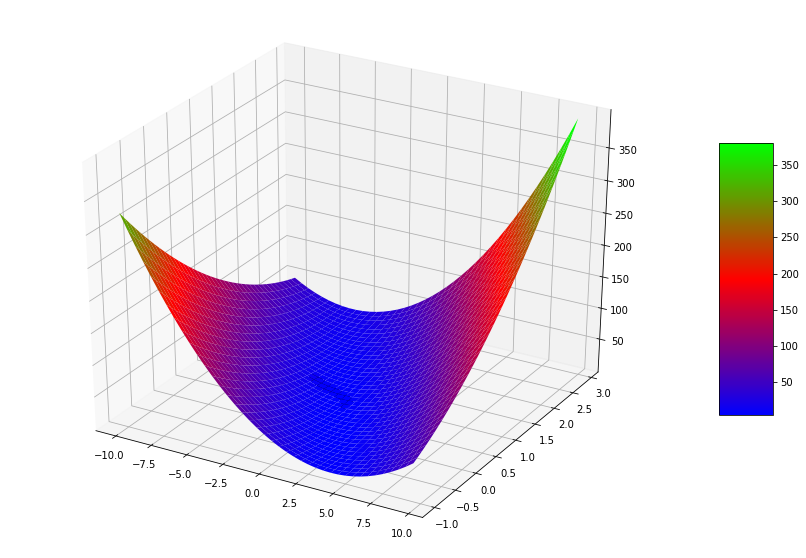

In [14]:
#The purpose of these graphs is to show you that how J(θ) varies with
#changes in θ0 and θ1. The cost function J(θ) is bowl-shaped and has a global
#mininum. This minimum is the optimal point for θ0 and θ1, and each step of
#gradient descent moves closer to this point.

#import aditional graphic libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#create graph
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

#calculate J values according to theta values
theta0_vals = np.arange(-10,10,.5)
theta1_vals = np.arange(-1,3,.1)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))
for i in range(theta0_vals.size):
    t0 = theta0_vals[i]
    for j in range(theta1_vals.size):    
        t1 = theta1_vals[j]
        t = np.array([[t0], [t1]])
        J_vals[i, j] = computeCost(X,y,t)

theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface.
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=cm.brg, linewidth=0)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Add theta_history to see how the minimum has been achieved
plt.plot([x[0] for x in theta_history],[x[1] for x in theta_history],J_history, 'bo-', color='black')

#finally...
plt.show()


### 3. Linear Regression with multiple variables

In [15]:
#Second file.
#In this file: 1-size of the house (in square feet); 2-number of bedrooms; 3-price of the house
datafile = pathdrive + 'data/ex1data2.txt'

df = pd.read_csv(datafile, header=None)
df.columns = ["Size", "NoBedrooms", "Price"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Size        47 non-null     int64
 1   NoBedrooms  47 non-null     int64
 2   Price       47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [16]:
df.describe()

,Size,NoBedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [17]:
#Get all cols in matrix format.
#Use numpy ndarray for best performance in calculations

#convert dataframe pandas into numpy ndarray 
#convert to float to favor next calculations
data = df.to_numpy(dtype=float)

#for extract data without pandas...
#cols = np.transpose(np.loadtxt(datafile, delimiter=',', unpack=True))

#Get "X" matrix, excluding last column 
X = data[:,:-1]

#Get "y" vector, from last column
y = data[:,-1:]

# m = number of training examples
m = y.size 

# Again, the first column in X matrix must be 1's 
X = np.insert(X,0,1,axis=1)

3.1 Feature Normalization


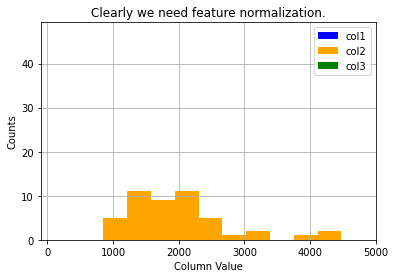

In [18]:
#Analyzing whether we need to normalize the data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1', color='blue')
dummy = plt.hist(X[:,1],label = 'col2', color='orange')
dummy = plt.hist(X[:,2],label = 'col3', color='green')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [19]:
# Function to normalize the features with datasets of all sizes
# To feature normalization, we subtract mean and divide by standard deviation
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.mean(X,axis=0)
  sigma = np.std(X,axis=0)
  #Important: we don't need normalize the first column (all ones)
  for i in range(1,X_norm.shape[1]):
    X_norm[:,i] = (X_norm[:,i] - mu[i])/sigma[i]

  return X_norm, mu, sigma 

In [20]:
# Normalize features 
X_norm, mu, sigma = featureNormalize(X)

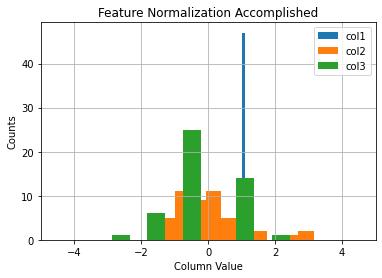

In [21]:
#Visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(X_norm[:,0],label = 'col1')
dummy = plt.hist(X_norm[:,1],label = 'col2')
dummy = plt.hist(X_norm[:,2],label = 'col3')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

3.1 Gradient Descent

3.2.1. Selecting learning rates


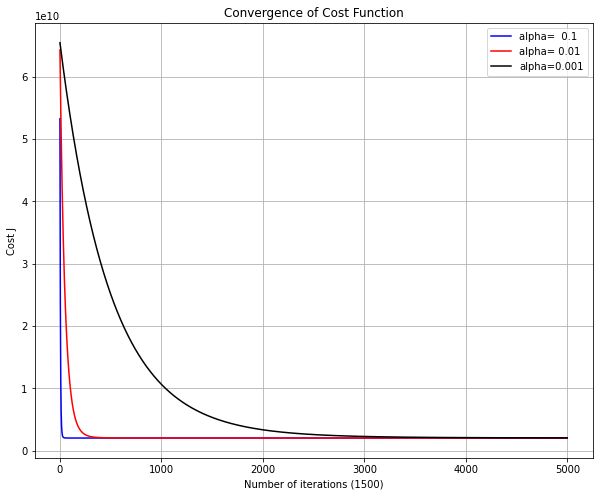

In [24]:
#Run gradient descent with multiple variables, initial theta still set to zeros
initial_theta = np.zeros((X_norm.shape[1],1))
iterations=5000

alpha=0.1
theta, thetahistory, J_history1 = gradientDescentMulti(X_norm,y,initial_theta, alpha, iterations) 

alpha=0.001
theta, thetahistory, J_history3 = gradientDescentMulti(X_norm,y,initial_theta, alpha, iterations) 

alpha=0.01
theta, thetahistory, J_history2 = gradientDescentMulti(X_norm,y,initial_theta, alpha, iterations) #keep theta calculated with alpha=0.01 for next calculcations


#Plot convergence of cost function:

plt.figure(figsize=(10,8))
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Number of iterations (1500)")
plt.ylabel("Cost J")

plt.setp(plt.plot(range(len(J_history1)),J_history1), color='b', label='alpha=  0.1')
plt.setp(plt.plot(range(len(J_history2)),J_history2), color='r', label='alpha= 0.01')
plt.setp(plt.plot(range(len(J_history3)),J_history3), color='k', label='alpha=0.001')
dummy = plt.legend()


In [47]:
#Making a prediction...
print("Prediction with gradient descent parameters: What is price of house with 1650 square feet and 3 bedrooms?")
price = 1650.
bedrooms = 3.
y_test = np.array([price,bedrooms])
#Add firs column with ones
y_test = np.append(np.ones((1,1)), y_test)

#For prediction, we need normalize values too before run calculations...
y_test_normalized = [(y_test[x]-mu[x])/sigma[x] for x in range(1,len(y_test))]
y_test_normalized.insert(0,1)

print("Theta computed from gradient descent: \n", theta)
print("prediction: {:,.2f}".format(float(h(y_test_normalized,theta))))

# result for iterations = 1500 => 293,098.47
# result for iterations = 3000 => 293,081.49
# result for iterations = 5000 => 293,081.46

# compare results above with normal equation below

Prediction with gradient descent parameters: What is price of house with 1650 square feet and 3 bedrooms?
Theta computed from gradient descent: 
 [[340412.65957447]
 [109447.79645425]
 [ -6578.35483877]]
prediction: 293,081.46


3.3 Normal Equations

In [43]:
#Implementation of normal equation to find analytic solution to linear regression
from numpy.linalg import inv

def normalEqn(X,y):
    return inv(X.T @ X) @ X.T @ y


In [48]:
print("Prediction with normal equation parameters: What is price of house with 1650 square feet and 3 bedrooms?")
theta_normEqn = normalEqn(X,y)
print("Theta computed from the normal equation: \n", theta_normEqn)
#Important: with normal equantion, we don´t need normalize the features
print("prediction: {:,.2f}".format(float(h(y_test,theta_normEqn))))

Prediction with normal equation parameters: What is price of house with 1650 square feet and 3 bedrooms?
Theta computed from the normal equation: 
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
prediction: 293,081.46
